# Syrtis Demonstration - Heat gain into propellant tank
# Heat Gain into a Low-Temperature Tank at Westcott, Bucks

In [1]:
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
from syrtis.solvermanager import ConfigurationManager
from syrtis import *
import numpy as np

## Setting up the Simulation

The tanks are assumed to be unpolished aluminium, with the inner wall held at a constant temperature equal to the nitrous temperature. Hemispherical endcaps are used on both ends - a slight error given the bottom of the tank is actually flat when the boot is included. Ground conduction is neglected.

ToolStation thermal blankets are used, with 3.7mm thickness and a thermal conductivity of 0.0025W/m/K

In [2]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
ambient_air = ConstrainedIdealGas("Air at sea level (15C, 1atm)", 101325, 29, 0.71, 17.9e-6, 1.01e3, 0.0252)
aluminium = Solid("Aluminium", 247, 2700, 900, 0.15)
thermal_blanket = Solid("ToolStation thermal blanket", 2.5e-3, 300, 900, absorb=0.15, emit=0.05)

westcott = Configuration("Wescott near noon", "constant temperature",
300, 1, 0.29, 300, 101325, 1, "cross", 90, 60, 1000, T_habitat=60)
westcott.air = ambient_air

In [3]:
tank = Habitat(orientation="vertical", length=0.6, endcap_type="hemisphere")
tank.create_static_shell(ambient_air, 0.1)
tank.create_static_shell(aluminium, 15e-3)

insulated_tank = copy.deepcopy(tank)
insulated_tank.create_static_shell(thermal_blanket, 3.7e-3)

In [4]:
cm_bare = ConfigurationManager(tank, westcott, {"T_habitat":list(range(253, 293,1 ))})
configs_bare, heats_bare, reports_bare = cm_bare.run_all_configurations(verbose=True)

In [5]:
cm_ins = ConfigurationManager(insulated_tank, westcott, {"T_habitat":list(range(253, 293,1 ))})
configs_ins, heats_ins, reports_ins = cm_ins.run_all_configurations(verbose=True)

## Results

Temperatures are negative because Syrtis defines positive heat flux as outwards

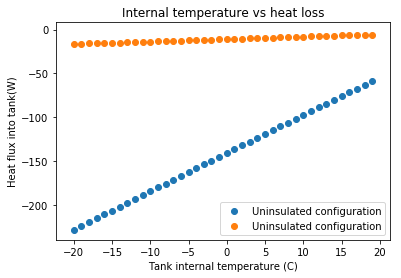

In [6]:
import matplotlib.pyplot as plt

habitat_temps = [(config["T_habitat"]-273) for config in configs_bare]
plt.scatter(habitat_temps, heats_bare, label="Uninsulated configuration")
plt.scatter(habitat_temps, heats_ins, label="Uninsulated configuration")

plt.ylabel("Heat flux into tank(W)")
plt.xlabel("Tank internal temperature (C)")
plt.title("Internal temperature vs heat loss")

plt.legend()
plt.show()

## Heat flux breakdowns

In [8]:
print(bare_report_273)

{'ID': 'Wescott near noon', 'Total heat flux out': -140.71629517580726, 'Outer wall temperature': 273.02112034143573, 'Convective loss from cylinder': -92.4523790843448, 'Convective loss from endcap': -12.594810109753064, 'Radiative loss to sky': 12.207115411363661, 'Radiative loss to ground': 12.207115411363661, 'Radiative gain from sky': -14.870032305297318, 'Radiative gain from ground': 1.0763813810435883, 'Direct solar gain': -23.816067213279375, 'Reflected solar gain': -22.473618666903604, 'Conduction loss to ground': 0}


In [9]:
print(ins_report_273)

{'ID': 'Wescott near noon', 'Total heat flux out': -10.923803863719545, 'Outer wall temperature': 309.7051822032528, 'Convective loss from cylinder': 32.64654499414052, 'Convective loss from endcap': 4.762720918478211, 'Radiative loss to sky': 6.990289931857039, 'Radiative loss to ground': 6.990289931857039, 'Radiative gain from sky': -15.42788502590331, 'Radiative gain from ground': 1.1167620789127441, 'Direct solar gain': -24.685804994651818, 'Reflected solar gain': -23.316721698409967, 'Conduction loss to ground': 0}
